# Stacked bar chart and layered histogram

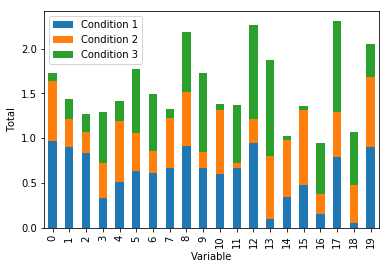

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Generate 20 random variables in three groups
df = pd.DataFrame({'Condition 1': np.random.rand(20),
                   'Condition 2': np.random.rand(20)*0.9,
                   'Condition 3': np.random.rand(20)*1.1})


# Create a figure with one axes
fig, ax = plt.subplots()

# Plot a stacked bar chart
df.plot.bar(ax=ax, stacked=True)

# Add axes labels using Matplotlib's API
ax.set_xlabel("Variable")
ax.set_ylabel("Total")

plt.show()

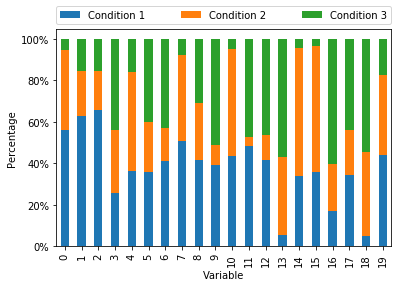

In [2]:
from matplotlib.ticker import FuncFormatter


# Get the ratio of each condition by dividing each data point by its column sum
df_ratio = df.div(df.sum(axis=1), axis=0)

# Create a figure with one axes
fig, ax = plt.subplots()

# Plot a stacked bar chart
df_ratio.plot.bar(ax=ax, stacked=True)

# Add axes labels using Matplotlib's API
ax.set_xlabel("Variable")
ax.set_ylabel("Percentage")

# Apply a FuncFormatter to convert y-tick labels to percentage
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

# Put legend outside the plotting area
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                ncol=3, mode="expand", borderaxespad=0.)

plt.show()

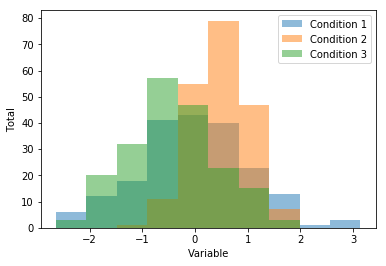

In [3]:
# Let's generate another random dataset with 200 random variables
df2 = pd.DataFrame({'Condition 1': np.random.randn(200),
                   'Condition 2': np.random.randn(200)*0.5+0.5,
                   'Condition 3': np.random.randn(200)-0.5})

# Create a figure with one axes
fig, ax = plt.subplots()

# Plot a layered histogram, alpha controls the transparency level
df2.plot.hist(ax=ax, alpha=0.5)

# Add axes labels using Matplotlib's API
ax.set_xlabel("Variable")
ax.set_ylabel("Total")

plt.show()

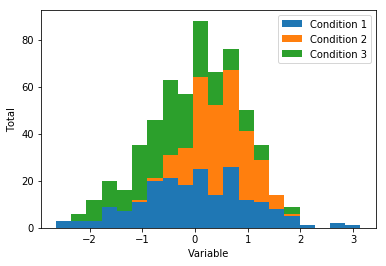

In [4]:
# Create a figure with one axes
fig, ax = plt.subplots()

# Plot a layered histogram, alpha controls the transparency level
df2.plot.hist(ax=ax, stacked=True, bins=20)

# Add axes labels using Matplotlib's API
ax.set_xlabel("Variable")
ax.set_ylabel("Total")

plt.show()

# Replacing bar charts with mean-and-error plots

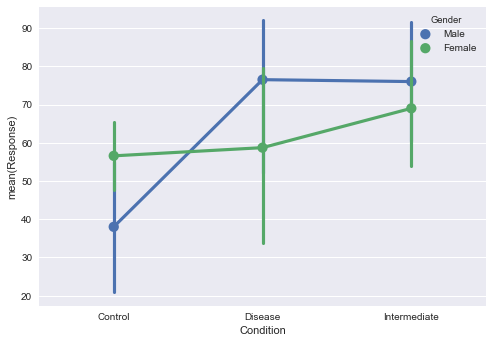

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Generate 30 individuals with random disease states, gender and response
df = pd.DataFrame({'Condition': np.random.choice(["Disease", "Intermediate", "Control"], 30),
                   'Gender': np.random.choice(["Male", "Female"], 30),
                   'Response': np.random.randint(10, high=100, size=30)})

# Create a figure
fig= plt.figure()

# Plot a pointplot
ax = sns.pointplot(x="Condition", y="Response", hue="Gender", data=df)

plt.show()

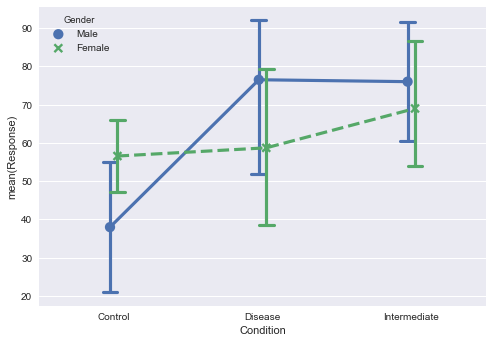

In [6]:
# Create a figure
fig= plt.figure()

# Plot a pointplot, with horizontal spacing and different styles between series
ax = sns.pointplot(x="Condition", y="Response",
                   hue="Gender",
                   dodge=True, 
                   markers=["o", "x"],
                   linestyles=["-", "--"],
                   capsize=.1,
                   data=df)

plt.show()

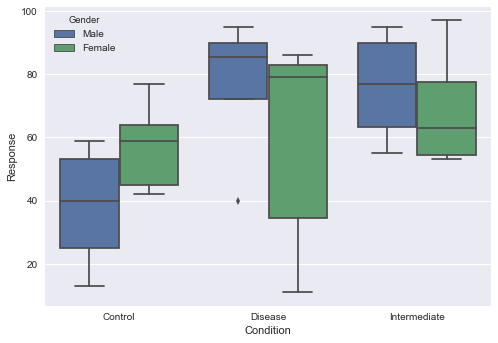

In [7]:
# Create a figure
fig= plt.figure()

# Plot a boxplot
ax = sns.boxplot(x="Condition", y="Response",
                   hue="Gender", data=df)

plt.show()

# Indicating statistical significance

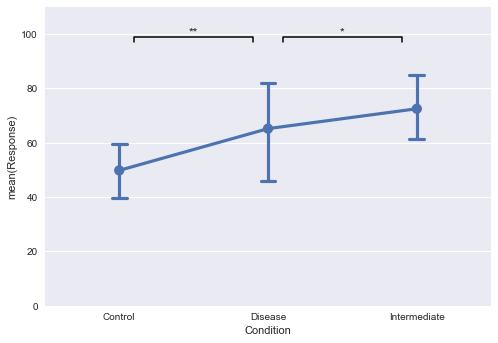

In [8]:
# Create a figure
fig= plt.figure()

# Plot a pointplot
ax = sns.pointplot(x="Condition", y="Response",
                   dodge=True, capsize=.1,
                   data=df)

# Top margin for asterisk position
h = 2
# Bracket location
y = df["Response"].max()

# Tick positions for each group
group1 = 0
group2 = 1
group3 = 2

# Plot a bracket across the first two groups
ax.plot([group1+0.1, group1+0.1, group2-0.1, group2-0.1], [y, y+h, y+h, y], lw=1.5, c="k")
# Plot a bracket across the last two groups
ax.plot([group2+0.1, group2+0.1, group3-0.1, group3-0.1], [y, y+h, y+h, y], lw=1.5, c="k")

# Indicate the statistical significance between the first two groups
ax.text((group1+group2)/2, y+h, "**", ha='center', va='bottom')
# Indicate the statistical significance between the last two groups
ax.text((group2+group3)/2, y+h, "*", ha='center', va='bottom')

# Increase the y-axis limit to show the new elements in full
ax.set_ylim(0,110)

plt.show()

# Methods for dimensions reduction

In [9]:
import pandas as pd


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
df = pd.read_csv(url, na_values="?")  # NaN values are given as ? in the dataset
df.head() # Show the first 5 rows

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [10]:
from sklearn.preprocessing import Imputer


# Impute missing values, and transform the data
impute =  pd.DataFrame(Imputer().fit_transform(df))
impute.columns = df.columns
impute.index = df.index

impute.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,6.140845,5.816901,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


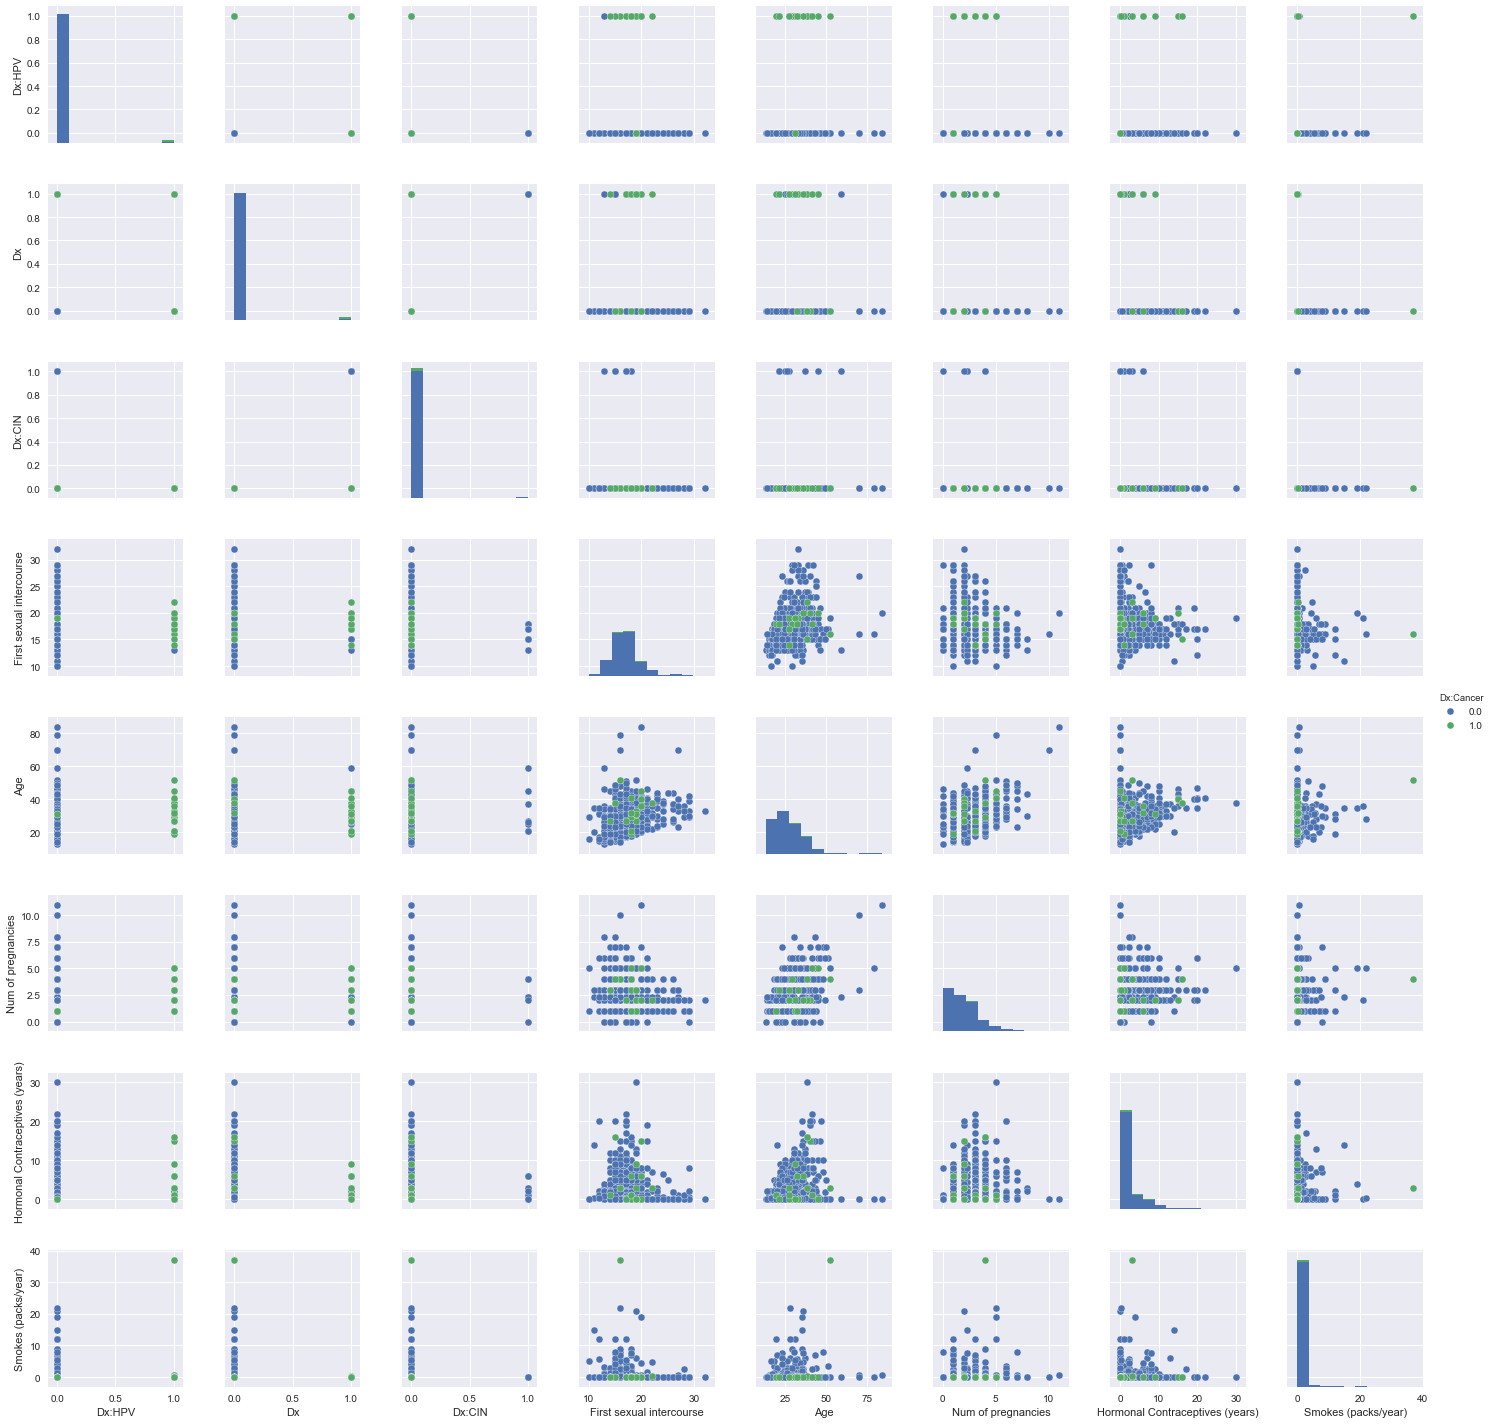

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# 8 selected features, ranked by importance
cols = ['Dx:HPV', 'Dx', 
        'Dx:CIN', 'First sexual intercourse', 
        'Age', 'Num of pregnancies',
        'Hormonal Contraceptives (years)', 'Smokes (packs/year)']

# Prepare a Seaborn pairplot based on the features above
sns.pairplot(impute,
             x_vars = cols,
             y_vars = cols,
             hue = 'Dx:Cancer')

plt.show()

In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


# Extra tree classifier
model = ExtraTreesClassifier()
model.fit(impute, df["Dx:Cancer"])

# Rank features by relative importance
importance = list(zip(model.feature_importances_, impute.columns))
importance.sort(reverse=True)

# Print the feature importance
for value, name in importance:
    print("{}: {}".format(name, value))

Dx:HPV: 0.4461226479380331
Dx:Cancer: 0.30298367099199697
Dx: 0.12882602902770546
Dx:CIN: 0.03461507936507938
Hormonal Contraceptives: 0.01170082596958702
STDs:HPV: 0.010879556544581188
First sexual intercourse: 0.010129934588381117
Smokes (years): 0.00742555052378005
IUD: 0.0072640620103054925
Citology: 0.006200442038677099
Number of sexual partners: 0.006002944993511028
Smokes (packs/year): 0.005957591374880944
Hinselmann: 0.003783068783068784
Schiller: 0.003714609027678669
Age: 0.0031166899861849407
IUD (years): 0.002904157336440471
Hormonal Contraceptives (years): 0.0028961955152431336
Smokes: 0.0021267703308451556
Biopsy: 0.0016513573112150125
Num of pregnancies: 0.0012058318161047616
STDs:condylomatosis: 0.0002209427096062695
STDs: Time since last diagnosis: 0.0001816594753247931
STDs:pelvic inflammatory disease: 6.285555157720442e-05
STDs:genital herpes: 1.7471140004309452e-05
STDs:vulvo-perineal condylomatosis: 6.018518518673069e-06
STDs: Number of diagnosis: 4.037131668934292e

# Principal Component Analysis (PCA)

Explained variance:
PC1 59.41%
PC2 14.59%
PC3 9.02%


<IPython.core.display.Javascript object>


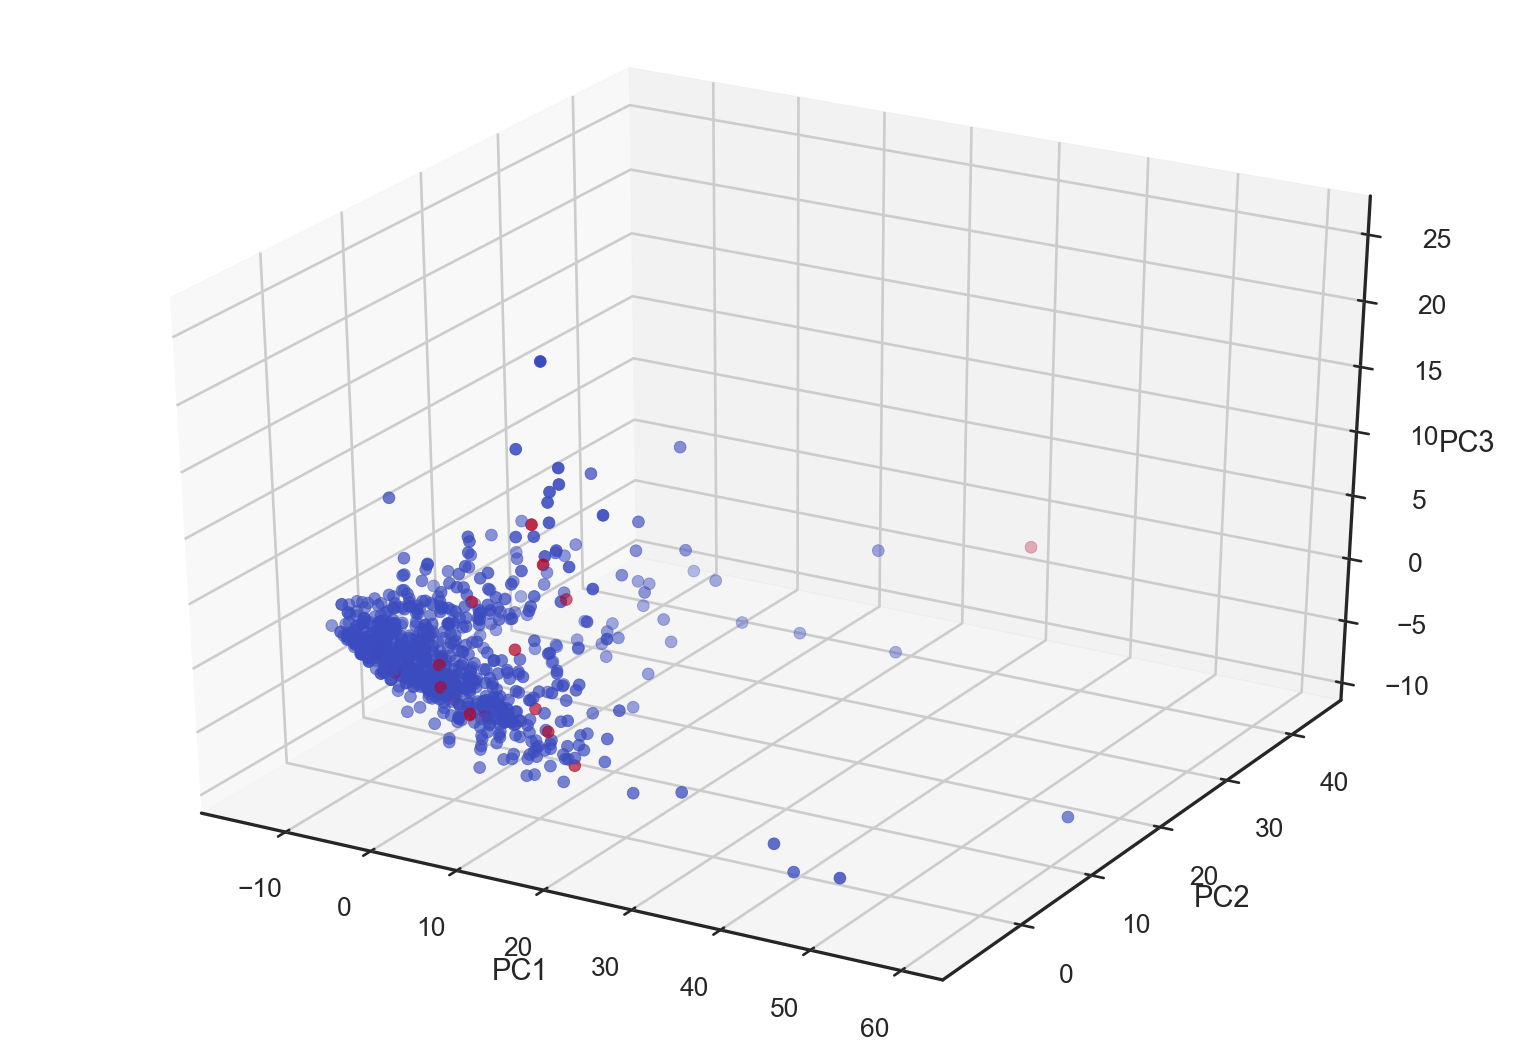

In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


sns.set(style='ticks')

# We would like to separate features from class labels.
# In this dataset, the Dx:Cancer column defines if the individual has cervical cancer.
# The rest of the columns can be treated as features for the prediction of cervical cancer.
features = impute.drop('Dx:Cancer', axis=1)
y = impute["Dx:Cancer"]

# Perform PCA
pca = PCA(n_components=3)
X_r = pca.fit_transform(features)

# Percentage of variance explained for each components
print("Explained variance:\nPC1 {:.2%}\nPC2 {:.2%}\nPC3 {:.2%}"
      .format(pca.explained_variance_ratio_[0],
              pca.explained_variance_ratio_[1],
              pca.explained_variance_ratio_[2]))

# Show as 3D scatter plot
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_r[:, 0], X_r[:, 1], X_r[:, 2], c=y, cmap=plt.cm.coolwarm)

# Label the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

# t-distributed Stochastic Neighbor Embedding (t-SNE)

<IPython.core.display.Javascript object>


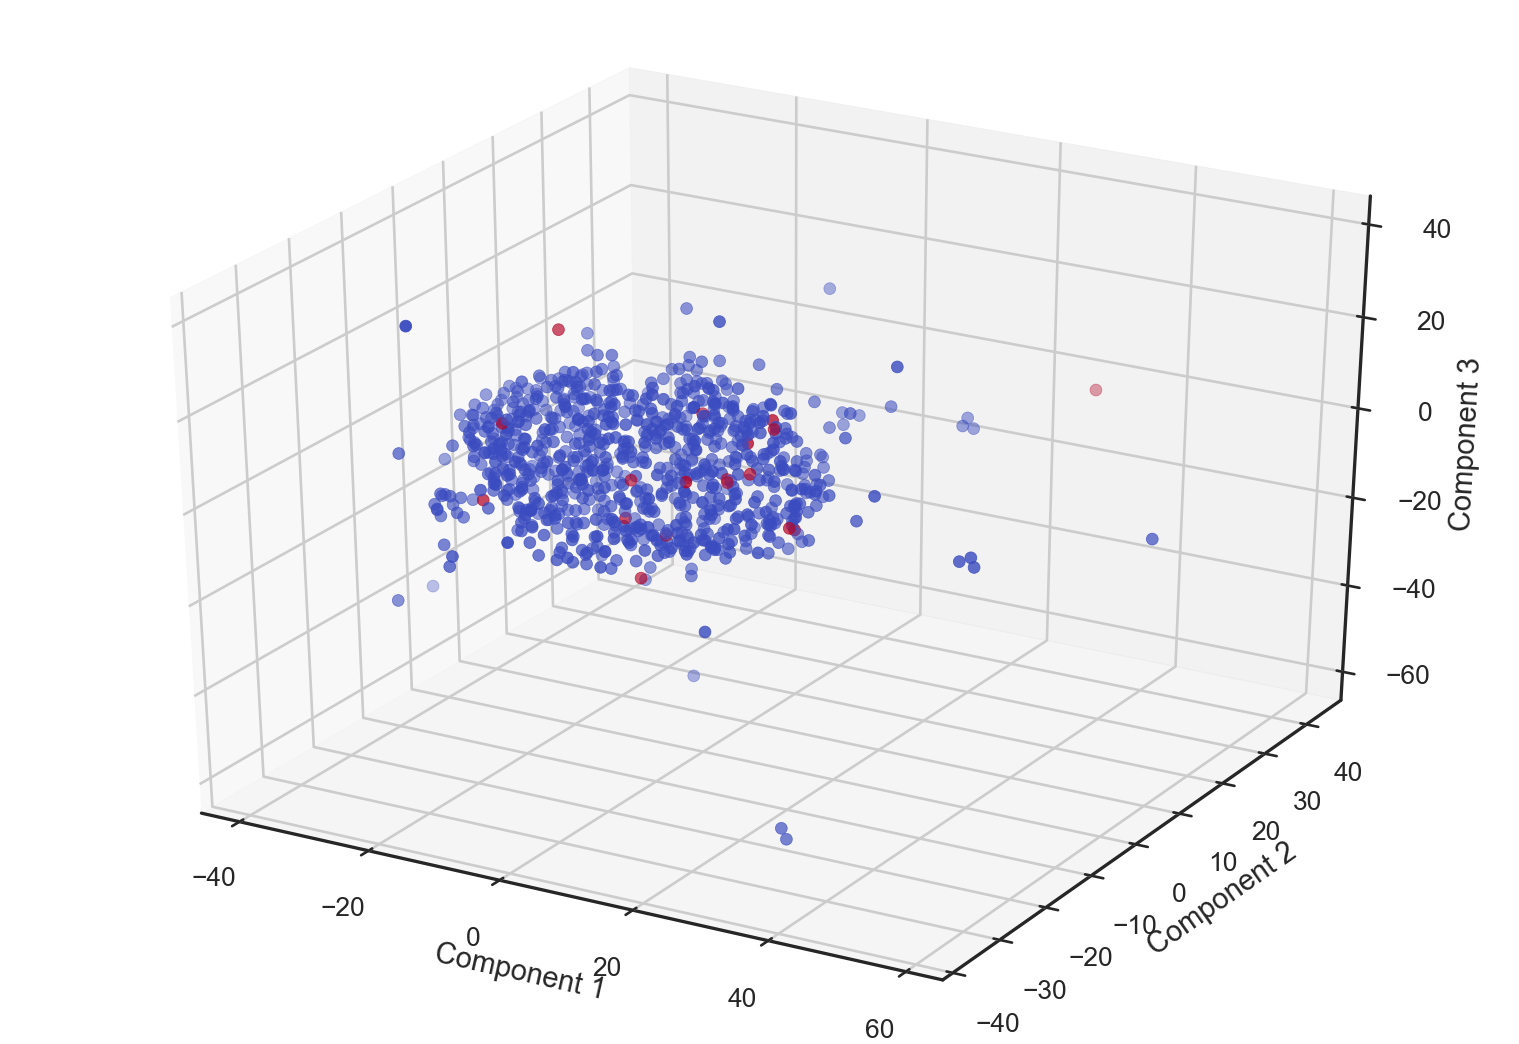

In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


sns.set(style='ticks')

# Perform t-SNE
tsne = TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne.fit_transform(features)
y = impute["Dx:Cancer"]

# Show as 3D scatter plot
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap=plt.cm.coolwarm)

# Label the axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()